# **FINAL GROUP PROJECT - INSY 695 - Enterprise Data Science**

# **E-Commerce Customer Churn Analysis and Prediction**

**USE CASE:** The aim of this project is to build a model to predict customer churn (i.e. predict which customers will cancel their subscriptions)

# FRAMING THE PROBLEM

- Define the objective in business terms.
- How will your solution be used?
- What are the current solutions/workarounds (if any)?
- How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
- How should performance be measured?
- Is the performance measure aligned with the business objective?
- What would be the minimum performance needed to reach the business objective?
- What are comparable problems? Can you reuse experience or tools?
- Is human expertise available?

## DATA ACQUISITION

**IMPORT PACKAGES**

In [1]:
import pandas as pd
import numpy as np
#!pip install pandas_profiling
#import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

#!pip install pyjanitor

import janitor as jn
from sklearn import (
    metrics,
    ensemble,
    model_selection,
    preprocessing,
    tree
)
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)

#!pip install yellowbrick
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve 
)

AttributeError: module 'pandas' has no attribute 'CategoricalDtype'

In [230]:
import warnings
import gc
warnings.simplefilter(action='ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

**IMPORT DATA**

Source: Kaggle

Link: https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

In [231]:
url = "https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Churn-Analysis/main/data/E%20Commerce%20Dataset.csv"
df = pd.read_csv(url)

In [232]:
url2 = "https://raw.githubusercontent.com/McGill-MMA-EnterpriseAnalytics/Churn-Analysis/main/data/Data%20Dictionary.csv"
data_dict = pd.read_csv(url2)

In [224]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


**DATA DICTIONARY**

In [233]:
data_dict.head(10)
data_dict = data_dict.drop('Data', axis=1)
data_dict.style.set_properties(subset=['Discerption'], **{'width': '400px'})

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or website
9,NumberOfDeviceRegistered,Total number of deceives is registered on particular customer


In [8]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


# 1 - EXPLORATORY DATA ANALYSIS

## Data Exploration

In [234]:
df.shape

(5630, 20)

### Check datatypes

In [235]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

Number of each type of column

Text(0, 0.5, 'Data type')

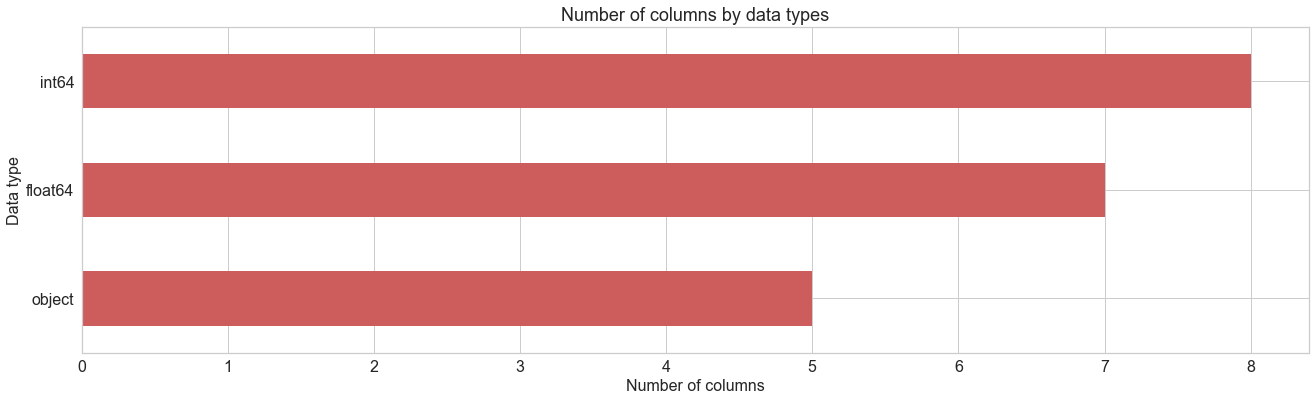

In [236]:
#FYI: COLOR NAMES: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

df.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(22, 6),
                                            fontsize=16,
                                           color="indianred")

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

Numerical Data:

Categorical Data:

### Check the column names

In [ ]:
df.columns

### Summary Statistics

In [ ]:
df.describe()

### Pandas Profiling

In [ ]:
#Generate a HTML report
profile = df.profile_report(title='Pandas Profiling Report')
#profile

profile.to_file(output_file="profile_report_output.html")

Notes from pandas profiling report:

### Check for missing values

In [237]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 20 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
DaySinceLastOrder,307,5.5
OrderAmountHikeFromlastYear,265,4.7
Tenure,264,4.7
OrderCount,258,4.6
CouponUsed,256,4.5
HourSpendOnApp,255,4.5
WarehouseToHome,251,4.5


In [ ]:
import missingno as msno
msno.matrix(df.sample(500), figsize=(12,8))
#msno.heatmap(df, figsize=(8, 8))

### Target Variable

In [ ]:
df['Churn'].unique()

### Check the distribution of 'Churn'

In [ ]:
df['Churn'].value_counts().plot(kind='bar', color='indianred')

**NOTE: We see signs of imbalanced data**

### Correlations between predictors and target variable

Drop 'CustomerID'

In [239]:
df = df.drop(['CustomerID'], axis=1)

KeyError: "['CustomerID'] not found in axis"

In [ ]:
corr = df.corr()['Churn'].sort_values()

# Display correlations
print('8 Positive Correlations:')
print('-----------------------------------')
print(corr.tail(8))
print('\n7 Negative Correlations:')
print('------------------------------')
print(corr.head(7))

In [ ]:
corr

We can see that no predictors are highly correlated with the target

## Data Visualization

Types of graphs to create:

- 

## Visualization of correlations between predictors and target variable

In [ ]:
#I think putting this graph here makes more sense. What do you think?

import seaborn as sns

plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot = True,  linewidths=.05) #could add  cmap="Purples" to change the colors 
plt.show()

### Pair plots across Churn

In [ ]:
sns.set(style="ticks")

sns.pairplot(df, hue="Churn", palette="Set1")
plt.show()


###Specify which variables you want to see
#from seaborn import pairplot
#new_df = df.copy()
#vars = ["WarehouseToHome", "OrderAmountHikeFromlastYear", "DateSinceLastOrder"]
#p = pairplot(
#    new_df, vars=vars, hue="Churn", kind="reg"
#)

### Distribution of numerical variables

In [ ]:
num_vars = df[['CashbackAmount','CouponUsed','DaySinceLastOrder','HourSpendOnApp','NumberOfAddress','NumberOfDeviceRegistered','OrderAmountHikeFromlastYear','OrderCount','SatisfactionScore','Tenure','WarehouseToHome']]

num_vars.hist(bins=20, figsize=(20,15), color='indianred')
plt.show();

### Matrix of all numerical variables (not sure if this gives any new information)

In [ ]:
from pandas.plotting import scatter_matrix

df1 = df.select_dtypes('int64','float64')
scatter_matrix(df[df1.columns], figsize=(30, 30));

### Distribution of Categorical Variables

Number of categories in each categorical variable

In [ ]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

In [ ]:
df['PreferredPaymentMode'].value_counts()

In [ ]:
cat_vars = df[['Gender','PreferredPaymentMode','CityTier','PreferredLoginDevice','PreferedOrderCat','MaritalStatus','Complain']]
#cat_vars.columns

colors = ['#fae2fe', '#f2b2fd','#eb82fd','#db22fb','#b303d0','#9e02b8','#600170','#440150','#140018']
fig, axes = plt.subplots(round(len(cat_vars.columns) / 4), 4, figsize=(20, 15))

for i, ax in enumerate(fig.axes):
    if i < len(cat_vars.columns):
        df[cat_vars.columns[i]].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax, colors=colors)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        ax.set_title(df.columns[i])

fig.tight_layout();

**Understanding characteristics of different Genders**

Gender is usually an important category, so let's explore it further

In [ ]:
#gender vs hourssepndonapp

fig, axes = plt.subplots(3, 2, figsize=(20,20))
axes = axes.flatten()

ax = sns.boxplot(x='HourSpendOnApp',y='Gender',data=df,palette='rainbow', ax=axes[0])
ax = sns.boxplot(x='OrderAmountHikeFromlastYear',y='Gender',data=df,palette='rainbow', ax=axes[1])
ax = sns.boxplot(x='CashbackAmount',y='Gender',data=df,palette='rainbow', ax=axes[2])
ax = sns.boxplot(x='SatisfactionScore',y='Gender',data=df,palette='rainbow', ax=axes[3])
ax = sns.boxplot(x='Tenure',y='Gender',data=df,palette='rainbow', ax=axes[4])
ax = sns.boxplot(x='CouponUsed',y='Gender',data=df,palette='rainbow', ax=axes[5])


**INSIGHTS:**

**Coupon vs Ordercount per Marital Status**

In [ ]:
fig, axes = plt.subplots(figsize=(40,10))
sns.barplot(x="OrderCount", y="CouponUsed", data=df,hue='MaritalStatus',palette='Set1')

### Initial Test of Hypotheses

Churn vs: satisfaction score, PreferredLoginDevice, CityTier, PreferredPaymentMode, Gender, PreferredOrderCat, MaritalStatus, Complain, Tenure, (I NEED TO REFINE THIS)

In [ ]:
#FYI - Color palette names: https://python-graph-gallery.com/python-colors/

fig, axes = plt.subplots(4, 4, figsize=(80,40))
axes = axes.flatten()

ax = sns.barplot(x ='PreferredLoginDevice', y ='Churn', data = df, palette = 'rainbow', orient='v', ax=axes[0])
ax = sns.scatterplot(x ='WarehouseToHome', y ='Churn', hue='Churn', data = df, palette = 'rainbow', ax=axes[1])
ax = sns.barplot(x ='PreferredPaymentMode', y ='Churn', data = df, palette = 'rainbow', orient='v', ax=axes[2])
ax = sns.scatterplot(x ='Tenure', y ='Churn', hue='Churn', data = df, palette = 'rainbow', ax=axes[3])
ax = sns.barplot(x ='Gender', y ='Churn', data = df, palette = 'rainbow', orient='v', ax=axes[4])
ax = sns.scatterplot(x ='HourSpendOnApp', y ='Churn', hue='Churn', data = df, palette = 'rainbow', ax=axes[5])
ax = sns.barplot(x ='PreferedOrderCat', y ='Churn', data = df, palette = 'rainbow', orient='v', ax=axes[6])
ax = sns.scatterplot(x ='OrderCount', y ='Churn', hue='Churn', data = df, palette = 'rainbow', ax=axes[7])
ax = sns.barplot(x ='MaritalStatus', y ='Churn', data = df, palette = 'rainbow', orient='v', ax=axes[8])
ax = sns.scatterplot(x ='CouponUsed', y ='Churn', hue='Churn', data = df, palette = 'rainbow', ax=axes[9])
ax = sns.barplot(x='SatisfactionScore', y='Churn', data=df, palette='rainbow', orient='v', ax=axes[10])
ax = sns.scatterplot(x ='CashbackAmount', y ='Churn', hue='Churn', data = df, palette = 'rainbow', ax=axes[11])
ax = sns.barplot(x='CityTier', y='Churn', data=df, palette='rainbow', orient='v', ax=axes[12])
ax = sns.barplot(x='Complain', y='Churn', data=df, palette='rainbow', orient='v', ax=axes[13])
ax = sns.barplot(x='NumberOfDeviceRegistered', y='Churn', data=df, palette='rainbow', orient='v', ax=axes[14])

**INSIGHTS:**

### Unsupervised Learning Analysis

Simulating new dataframe with some pre-processing for this analysis

In [ ]:
df1 = df
df1 = pd.get_dummies(df1, columns=['PreferredLoginDevice','CityTier', 'PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain'])
df1.columns
def clean_col(name):
    return (
        name.strip().replace(" ", "")
    )

df1 = df1.rename(columns=clean_col)
df1.head()

df1['DaySinceLastOrder'] = df1['DaySinceLastOrder'].fillna(df1['DaySinceLastOrder'].median())
df1['OrderAmountHikeFromlastYear'] = df1['OrderAmountHikeFromlastYear'].fillna(df1['OrderAmountHikeFromlastYear'].median())
df1['Tenure'] = df1['Tenure'].fillna(df1['Tenure'].median())
df1['OrderCount'] = df1['OrderCount'].fillna(df1['OrderCount'].median())
df1['CouponUsed'] = df1['CouponUsed'].fillna(df1['CouponUsed'].median())
df1['HourSpendOnApp'] = df1['HourSpendOnApp'].fillna(df1['HourSpendOnApp'].median())
df1['WarehouseToHome'] = df1['WarehouseToHome'].fillna(df1['WarehouseToHome'].median())

df1.keys()

**PCA**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)
scaled_data = scaler.transform(df1)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df1['Churn'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
pca.components_

**INSIGHTS:**

In [ ]:
map= pd.DataFrame(pca.components_,columns=df1.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

Use: https://datascienceplus.com/principal-component-analysis-pca-with-python/ for analysis

**INSIGHTS:**

In [ ]:
#!pip install umap-learn

In [ ]:
#conda install -c conda-forge umap-learn

In [ ]:
#conda install -c conda-forge pynndescent

In [ ]:
#pip install pynndescent==0.5.2

In [ ]:
#pip freeze > requirements.txt

In [ ]:
#pip install umap-learn[plot]

In [ ]:
#pip install umap-learn[parametric_umap]

In [ ]:
#pip install umap-learn
X = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_MobilePhone', 'PreferredLoginDevice_Phone',
       'CityTier_1', 'CityTier_2', 'CityTier_3', 'PreferredPaymentMode_CC',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_CashonDelivery',
       'PreferredPaymentMode_CreditCard', 'PreferredPaymentMode_DebitCard',
       'PreferredPaymentMode_Ewallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop&Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_MobilePhone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Complain_0',
       'Complain_1']
import umap
u = umap.UMAP(random_state=42)
X_umap = u.fit_transform()  
StandardScaler().fit_transform(X)
X_umap.shape

In [ ]:
#pip install -r requirements.txt

In [ ]:
#conda install scikit-learn numba

### PHATE

In [ ]:
import phate
p = phate.PHATE(random_state=42)
X_phate = p.fit_transform(X)
X_phate.shape
fig, ax = plt.subplots(figsize=(6, 4))
phate.plot.scatter2d(p, c=y, ax=ax, alpha=0.5)
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
axes = axes.reshape(4)
p = phate.PHATE(random_state=42, n_jobs=-1)
for i, n in enumerate((2, 5, 20, 100)):
    ax = axes[i]
    p.set_params(knn=n)
    X_phate = p.fit_transform(X)
    pd.DataFrame(X_phate).plot(
        kind="scatter",
        x=0,
        y=1,
        ax=ax,
c=y,
        cmap="Spectral", alpha=0.5,
    )   
ax.set_title(f"knn={n}")
plt.tight_layout()

### t-SNE

In [ ]:
X = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_MobilePhone', 'PreferredLoginDevice_Phone',
       'CityTier_1', 'CityTier_2', 'CityTier_3', 'PreferredPaymentMode_CC',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_CashonDelivery',
       'PreferredPaymentMode_CreditCard', 'PreferredPaymentMode_DebitCard',
       'PreferredPaymentMode_Ewallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop&Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_MobilePhone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Complain_0',
       'Complain_1']
X = df1[X]
y = df1['Churn']
from sklearn.manifold import TSNE
X_std = StandardScaler().fit_transform(X)
ts = TSNE()
X_tsne = ts.fit_transform(X_std)
fig, ax = plt.subplots(figsize=(6, 4))
colors = ["rg"[j] for j in y]
scat = ax.scatter(
X_tsne[:, 0], X_tsne[:, 1], c=colors,alpha=0.5,
)   
ax.set_xlabel("Embedding 1")
ax.set_ylabel("Embedding 2")
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
axes = axes.reshape(4)
for i, n in enumerate((2, 30, 50, 100)):
    ax = axes[i]
    t = TSNE(random_state=42, perplexity=n)
    X_tsne = t.fit_transform(X)
    pd.DataFrame(X_tsne).plot(
        kind="scatter",
        x=0,
        y=1,
        ax=ax,
c=y,
        cmap="Spectral",alpha=0.5,
    )   
    ax.set_title(f"perplexity={n}")
plt.tight_layout()

## Clustering

### KNN 

In [ ]:
from sklearn.cluster import KMeans 
k=4
kmeans = KMeans(n_clusters=k) 
y_pred = kmeans.fit_predict(X)
# KMeans instance preserves the labels of
# the instances it was trained on
y_pred is kmeans.labels_
kmeans.cluster_centers_
y_kmeans = kmeans.fit_predict(X)

kmeans.inertia_
kmeans.score(X)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit
silhouette_visualizer(KMeans(5, random_state=42), X, colors='yellowbrick')

In [ ]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

### DBSCAN

In [ ]:
X = StandardScaler().fit_transform(X)

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_
len(dbscan.core_sample_indices_)
dbscan.core_sample_indices_
dbscan.components_
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Data Cleaning

**INFORMATION LEAKAGE**

We considered the possibility of *SatisfactionScore** leaking information into our model. However, after the exploratory analysis, we saw that there was no correlation between *SatisfactionScore* and *Churn*, so we have decided to keep it in the model.

# 2 - DATA PREPARATION

### TRAIN-TEST-VAL Split

We will split the data into Train, Test and Validation sets, so that when we pre-process, we only use the train set so that we do not leak information to the test and validation sets

In [11]:
#X, y = jn.ml.get_features_targets(df, target_columns="Churn")

train(70%) , test(30%) split

In [241]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=42)

test(50%) val(50%) split

In [13]:
#from sklearn.model_selection import train_test_split
#test, val = train_test_split(test, test_size=0.5, random_state=42)

In [242]:
print(len(train))
print(len(test))
#print(len(val))

3941
1689


### Fill in Missing Values


In [243]:
train.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1559,1,0.0,Phone,1,NaN,COD,Female,2.0,3,Mobile,5,Single,6,1,11.0,0.0,1.0,4.0,127
993,0,NaN,Phone,1,9.0,Debit Card,Female,2.0,3,Mobile,1,Married,2,0,21.0,1.0,1.0,0.0,121
1187,1,0.0,Phone,2,24.0,UPI,Male,NaN,1,Mobile,5,Married,1,0,17.0,1.0,1.0,0.0,130
188,0,6.0,Computer,1,11.0,Debit Card,Female,3.0,3,Fashion,4,Divorced,7,0,11.0,2.0,8.0,NaN,219
4630,0,1.0,Computer,3,31.0,Credit Card,Male,3.0,4,Mobile Phone,1,Married,2,0,14.0,2.0,3.0,2.0,149


**Simple Imputer**

In [16]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='median')

#imputer.fit(train[['DaySinceLastOrder','OrderAmountHikeFromlastYear','Tenure','OrderCount','CouponUsed','HourSpendOnApp',
#                  'WarehouseToHome']])

In [244]:
train['DaySinceLastOrder'] = train['DaySinceLastOrder'].fillna(train['DaySinceLastOrder'].median())
train['OrderAmountHikeFromlastYear'] = train['OrderAmountHikeFromlastYear'].fillna(train['OrderAmountHikeFromlastYear'].median())
train['Tenure'] = train['Tenure'].fillna(train['Tenure'].median())
train['OrderCount'] = train['OrderCount'].fillna(train['OrderCount'].median())
train['CouponUsed'] = train['CouponUsed'].fillna(train['CouponUsed'].median())
train['HourSpendOnApp'] = train['HourSpendOnApp'].fillna(train['HourSpendOnApp'].median())
train['WarehouseToHome'] = train['WarehouseToHome'].fillna(train['WarehouseToHome'].median())

#val['DaySinceLastOrder'] = val['DaySinceLastOrder'].fillna(val['DaySinceLastOrder'].median())
#val['OrderAmountHikeFromlastYear'] = val['OrderAmountHikeFromlastYear'].fillna(val['OrderAmountHikeFromlastYear'].median())
#val['Tenure'] = val['Tenure'].fillna(val['Tenure'].median())
#val['OrderCount'] = val['OrderCount'].fillna(val['OrderCount'].median())
#val['CouponUsed'] = val['CouponUsed'].fillna(val['CouponUsed'].median())
#val['HourSpendOnApp'] = val['HourSpendOnApp'].fillna(val['HourSpendOnApp'].median())
#val['WarehouseToHome'] = val['WarehouseToHome'].fillna(val['WarehouseToHome'].median())

#test['DaySinceLastOrder'] = test['DaySinceLastOrder'].fillna(test['DaySinceLastOrder'].median())
#test['OrderAmountHikeFromlastYear'] = test['OrderAmountHikeFromlastYear'].fillna(test['OrderAmountHikeFromlastYear'].median())
#test['Tenure'] = test['Tenure'].fillna(test['Tenure'].median())
#test['OrderCount'] = test['OrderCount'].fillna(test['OrderCount'].median())
#test['CouponUsed'] = test['CouponUsed'].fillna(test['CouponUsed'].median())
#test['HourSpendOnApp'] = test['HourSpendOnApp'].fillna(test['HourSpendOnApp'].median())
#test['WarehouseToHome'] = test['WarehouseToHome'].fillna(test['WarehouseToHome'].median())



In [245]:
# Re-check for missing values
miss_values_train = missing_values(train)
#miss_values_val = missing_values(val)
#miss_values_test = missing_values(test)

print(miss_values_train)
#print(miss_values_val)
#print(miss_values_test)

Dataframe has 19 columns.
There are 0 columns that have missing values.
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


### Categorical Encoding

None of the categorial variables have an ordinal relationshpi, so we will use One-Hot Encoding.

In [246]:
train.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [247]:
train = pd.get_dummies(train, columns=['PreferredLoginDevice','CityTier', 'PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain'])
#val = pd.get_dummies(val, columns=['PreferredLoginDevice','CityTier', 'PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','Complain'])

In [248]:
train.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_0,Complain_1
1559,1,0.0,14.0,2.0,3,5,6,11.0,0.0,1.0,...,0,0,1,0,0,0,0,1,0,1
993,0,9.0,9.0,2.0,3,1,2,21.0,1.0,1.0,...,0,0,1,0,0,0,1,0,1,0
1187,1,0.0,24.0,3.0,1,5,1,17.0,1.0,1.0,...,0,0,1,0,0,0,1,0,1,0
188,0,6.0,11.0,3.0,3,4,7,11.0,2.0,8.0,...,0,0,0,0,0,1,0,0,1,0
4630,0,1.0,31.0,3.0,4,1,2,14.0,2.0,3.0,...,0,0,0,1,0,0,1,0,1,0


In [22]:
train.dtypes

Churn                                      int64
Tenure                                   float64
WarehouseToHome                          float64
HourSpendOnApp                           float64
NumberOfDeviceRegistered                   int64
SatisfactionScore                          int64
NumberOfAddress                            int64
OrderAmountHikeFromlastYear              float64
CouponUsed                               float64
OrderCount                               float64
DaySinceLastOrder                        float64
CashbackAmount                             int64
PreferredLoginDevice_Computer              uint8
PreferredLoginDevice_Mobile Phone          uint8
PreferredLoginDevice_Phone                 uint8
CityTier_1                                 uint8
CityTier_2                                 uint8
CityTier_3                                 uint8
PreferredPaymentMode_CC                    uint8
PreferredPaymentMode_COD                   uint8
PreferredPaymentMode

**Clean column names**

In [249]:
def clean_col(name):
    return (
        name.strip().replace(" ", "")
    )

train = train.rename(columns=clean_col)
train.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_0,Complain_1
1559,1,0.0,14.0,2.0,3,5,6,11.0,0.0,1.0,...,0,0,1,0,0,0,0,1,0,1
993,0,9.0,9.0,2.0,3,1,2,21.0,1.0,1.0,...,0,0,1,0,0,0,1,0,1,0
1187,1,0.0,24.0,3.0,1,5,1,17.0,1.0,1.0,...,0,0,1,0,0,0,1,0,1,0
188,0,6.0,11.0,3.0,3,4,7,11.0,2.0,8.0,...,0,0,0,0,0,1,0,0,1,0
4630,0,1.0,31.0,3.0,4,1,2,14.0,2.0,3.0,...,0,0,0,1,0,0,1,0,1,0


### Correlations

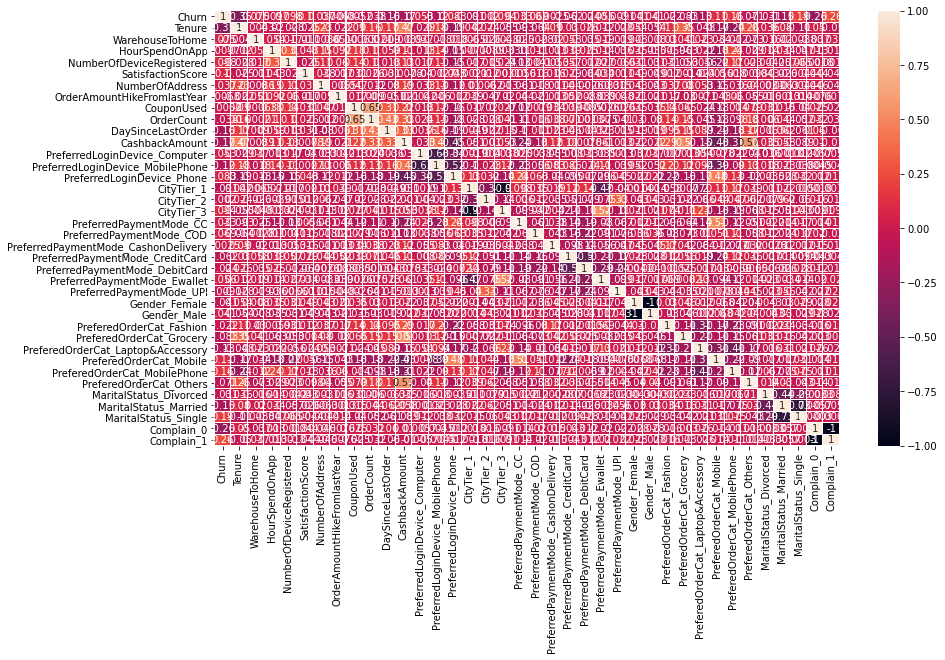

In [24]:
import seaborn as sns

plt.figure(figsize=(14,8))
sns.heatmap(train.corr(),annot = True,  linewidths=.05) #could add  cmap="Purples" to change the colors 
plt.show()

**INSIGHTS:**
- Negative correlation between Gender_Female and Gender_Male (-1) 
- Negative correlation between Complain_0 and Complain_1 (-1) 
- Negative correlatio between CityTier_1 and CityTier_3 (0.9) 

In [25]:
corr_matrix = train.corr().abs()

mat = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
mat

Complain_0                           Complain_1                             1.000000
Gender_Female                        Gender_Male                            1.000000
CityTier_1                           CityTier_3                             0.902594
MaritalStatus_Married                MaritalStatus_Single                   0.731864
CouponUsed                           OrderCount                             0.650843
PreferredLoginDevice_Computer        PreferredLoginDevice_MobilePhone       0.626254
CashbackAmount                       PreferedOrderCat_Others                0.573587
PreferredLoginDevice_MobilePhone     PreferredLoginDevice_Phone             0.521329
CityTier_3                           PreferredPaymentMode_Ewallet           0.519418
PreferredPaymentMode_CC              PreferedOrderCat_Mobile                0.511823
CashbackAmount                       PreferedOrderCat_Grocery               0.503235
PreferredPaymentMode_CreditCard      PreferredPaymentMode_DebitCa

**Remove Correlated Variables**

In [250]:
#drop complain_0, Gender_Male, and CityTier_3
train = train.drop(['Complain_0','Gender_Male','CityTier_3'], axis=1)
#val = val.drop(['Complain_0','Gender_Male','CityTier_3'], axis=1)

In [251]:
train.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_1
1559,1,0.0,14.0,2.0,3,5,6,11.0,0.0,1.0,...,0,0,0,1,0,0,0,0,1,1
993,0,9.0,9.0,2.0,3,1,2,21.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0
1187,1,0.0,24.0,3.0,1,5,1,17.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0
188,0,6.0,11.0,3.0,3,4,7,11.0,2.0,8.0,...,1,0,0,0,0,0,1,0,0,0
4630,0,1.0,31.0,3.0,4,1,2,14.0,2.0,3.0,...,0,0,0,0,1,0,0,1,0,0


### Outlier Treatment

Find outliers on the train set

Text(0, 0.5, 'Values')

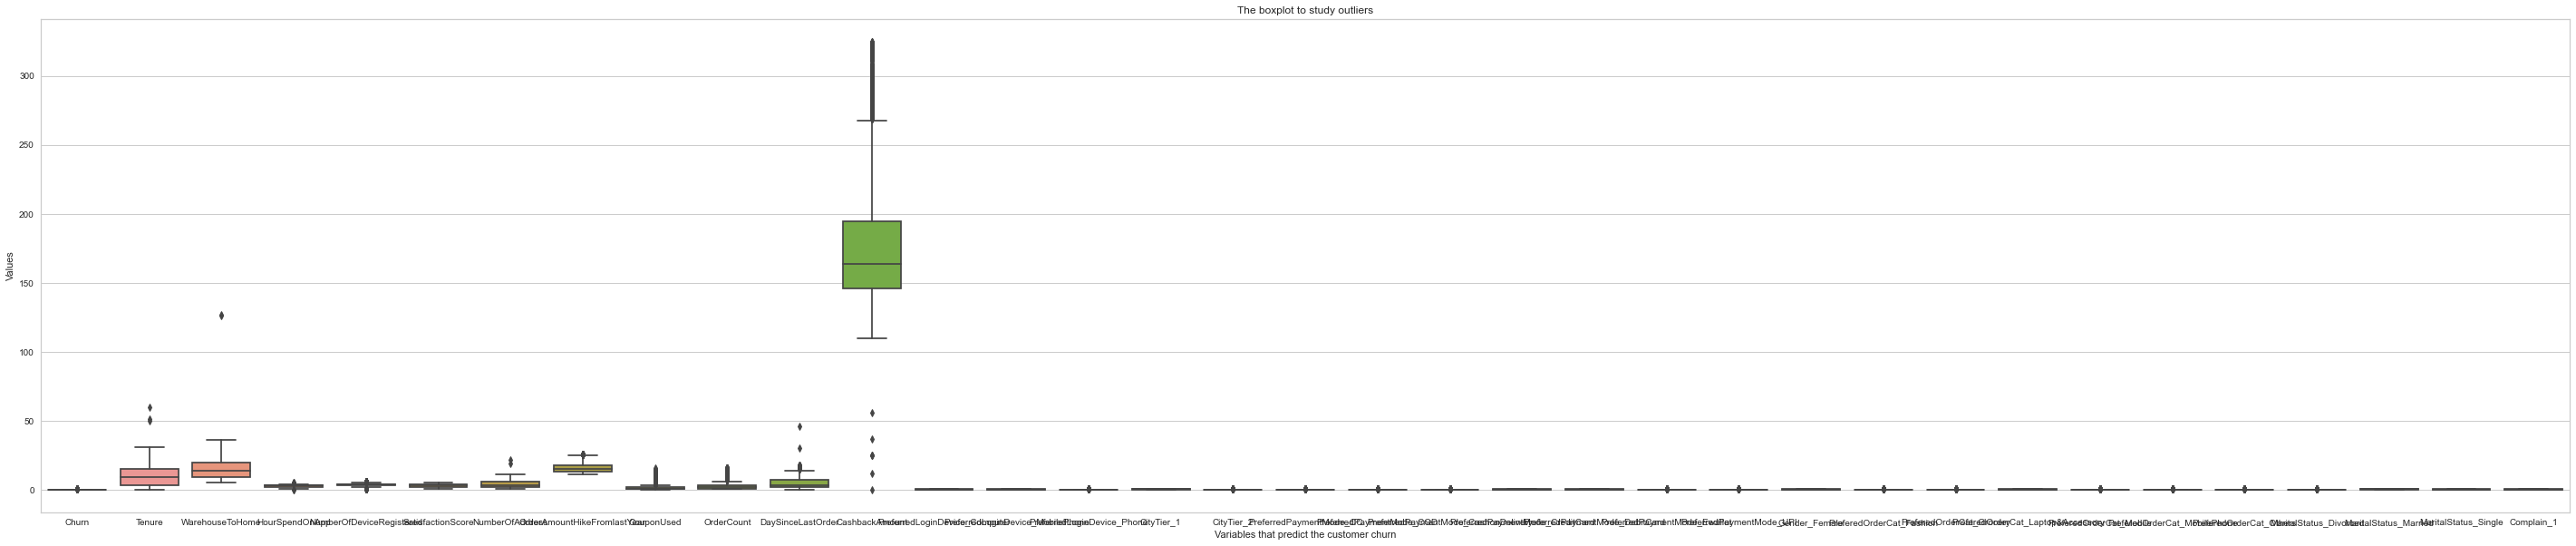

In [252]:
plt.figure(figsize=(50,10))
sns.boxplot(data=train)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

**INSIGHTS:** Quite a lot of outliers, espcially with 'CashbackAmount'

In [253]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
pred = iforest.fit_predict(train)
score = iforest.decision_function(train)

from numpy import where
anom_index = where(pred== -1)
values = train.iloc[anom_index]
values

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_1
1187,1,0.0,24.0,3.0,1,5,1,17.0,1.0,1.0,...,0,0,0,1,0,0,0,1,0,0
627,1,0.0,22.0,3.0,1,5,2,16.0,15.0,15.0,...,0,0,0,1,0,0,0,0,1,0
5035,0,18.0,36.0,3.0,4,1,3,26.0,7.0,14.0,...,0,0,1,0,0,0,0,0,1,0
4698,0,15.0,7.0,3.0,5,3,3,15.0,2.0,3.0,...,0,0,0,0,0,1,0,1,0,0
2908,0,19.0,13.0,3.0,5,2,8,13.0,13.0,13.0,...,1,0,0,0,0,0,0,0,1,0
4600,1,1.0,30.0,3.0,4,5,11,16.0,2.0,2.0,...,1,0,0,0,0,0,0,1,0,1
1772,0,30.0,34.0,3.0,4,5,5,19.0,3.0,13.0,...,1,0,0,0,0,0,0,1,0,0
1746,0,29.0,12.0,2.0,1,5,10,11.0,6.0,2.0,...,0,1,0,0,0,0,0,1,0,0
5021,0,20.0,9.0,4.0,4,5,10,15.0,7.0,16.0,...,0,1,0,0,0,0,0,1,0,0
2380,0,9.0,14.0,3.0,1,4,10,18.0,1.0,1.0,...,0,0,0,1,0,0,0,0,1,0


Out of 3941 observations, there are 79 outliers. **We will remove the outliers**

In [254]:
train = train[~train.index.isin(values.index)]
train.shape

(3862, 35)

### Separate Features and Targets

Separate in train, test and val sets

In [255]:
y_train = train['Churn']
X_train = train.drop(columns=['Churn'])

#y_val = val['Churn']
#X_val = val.drop(columns=['Churn'])

y_test = test['Churn']
X_test = test.drop(columns=['Churn'])



In [256]:
X_train.columns

Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_MobilePhone', 'PreferredLoginDevice_Phone',
       'CityTier_1', 'CityTier_2', 'PreferredPaymentMode_CC',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_CashonDelivery',
       'PreferredPaymentMode_CreditCard', 'PreferredPaymentMode_DebitCard',
       'PreferredPaymentMode_Ewallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop&Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_MobilePhone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Complain_1'],
      dtype='object')

### Feature Selection

RFE

In [257]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(max_iter=5000)
rfe=RFE(lr,n_features_to_select=20)
model=rfe.fit(X_train,y_train)
model.support_
model.ranking_

pd.DataFrame(list(zip(X_train.columns,model.ranking_)), columns = ['predictor','ranking']).sort_values("ranking")

,predictor,ranking
0,Tenure,1
31,MaritalStatus_Married,1
30,MaritalStatus_Divorced,1
27,PreferedOrderCat_Mobile,1
26,PreferedOrderCat_Laptop&Accessory,1
23,Gender_Female,1
22,PreferredPaymentMode_UPI,1
21,PreferredPaymentMode_Ewallet,1
19,PreferredPaymentMode_CreditCard,1
18,PreferredPaymentMode_CashonDelivery,1


LASSO

In [258]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)

from sklearn.linear_model import Lasso
model = Lasso(alpha=0.01)
model.fit(X_std,y_train)
model.coef_

pd.DataFrame(list(zip(X_train.columns,model.coef_)), columns = ['predictor','coefficient']).sort_values("coefficient")

,predictor,coefficient
0,Tenure,-0.109209
26,PreferedOrderCat_Laptop&Accessory,-0.044077
14,CityTier_1,-0.024539
9,DaySinceLastOrder,-0.016861
12,PreferredLoginDevice_MobilePhone,-0.008013
23,Gender_Female,-0.005494
19,PreferredPaymentMode_CreditCard,-0.004050
10,CashbackAmount,-0.003410
31,MaritalStatus_Married,-0.002284
22,PreferredPaymentMode_UPI,-0.000468


Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=0)

model = randomforest.fit(X_train,y_train)

model.feature_importances_

pd.DataFrame(list(zip(X_train.columns,model.feature_importances_)), columns = ['predictor','feature importance']).sort_values("feature importance")

,predictor,feature importance
29,PreferedOrderCat_Others,0.001106
25,PreferedOrderCat_Grocery,0.002900
18,PreferredPaymentMode_CashonDelivery,0.003409
15,CityTier_2,0.003805
16,PreferredPaymentMode_CC,0.004847
22,PreferredPaymentMode_UPI,0.006252
30,MaritalStatus_Divorced,0.006394
24,PreferedOrderCat_Fashion,0.007550
27,PreferedOrderCat_Mobile,0.009168
17,PreferredPaymentMode_COD,0.009814


Compare RFE and LASSO and see which variables overlap - remove them



### Baseline Model Classifier

In [259]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)

DummyClassifier()

Accuracy

In [260]:
#dummy_clf.score(X_val, y_val)

Precision

In [261]:
#print(metrics.confusion_matrix(y_val, dummy_clf.predict(X_val)))

In [262]:
#import matplotlib.pyplot as plt  
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(dummy_clf, X_val, y_val)  
#plt.show()  

In [263]:
#print(metrics.classification_report(dummy_clf.predict(X_val), y_val, digits=3))

### Standardize the Data

In [264]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#X_val = sc.transform(X_val)
#X_test = sc.transform(X_test)


### Evaluation Metrics

ROC Curves

In [265]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

PR Curve

In [266]:
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

Classification Score

In [267]:
def clf_score(clf, X_train, y_train, X_val, y_val, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        plot_confusion_matrix(clf,  X_val, clf.predict(X_val))
        print("End of validation Result\n")

Classification Metrics

In [268]:
def evaluation_metrics(y_actual, y_pred):
            
        precision, recall, _ = precision_recall_curve(y_actual, y_pred)
        average_precision = average_precision_score(y_actual, y_pred)
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_actual, y_pred)
        roc_auc = roc_auc_score(y_actual, y_pred)
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_actual, y_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_actual, y_pred)))

### Dealing with Imbalanced Data

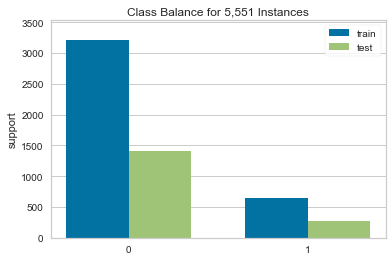

<AxesSubplot:title={'center':'Class Balance for 5,551 Instances'}, ylabel='support'>

In [269]:
from yellowbrick.target import ClassBalance

# Instantiate the visualizer
visualizer = ClassBalance(labels=[0, 1])

visualizer.fit(y_train, y_test)        # Fit the data to the visualizer
visualizer.show()  

The resulting figure allows us to diagnose the severity of the balance issue. In this figure we can see that the "0" class dominates the "1" class. 

Oversampling

In [270]:
print('Before OverSampling, the shape of X: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y_train.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, the shape of X: (3862, 34)
Before OverSampling, the shape of y: (3862,) 

Before OverSampling, counts of label '1': 653
Before OverSampling, counts of label '0': 3209


In [271]:
#!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_sample(X_train, y_train)
pd.Series(y_train_ros).value_counts()

1    3209
0    3209
Name: Churn, dtype: int64

In [272]:
print('After OverSampling, the shape of X: {}'.format(X_train_ros.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_train_ros.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_ros == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_ros == 0)))

After OverSampling, the shape of X: (6418, 34)
After OverSampling, the shape of y: (6418,) 

After OverSampling, counts of label '1': 3209
After OverSampling, counts of label '0': 3209


In [273]:
X_train_ros

array([[-1.20496696, -0.18433922, -1.33264641, ..., -1.07197829,
         1.45500167,  1.59166401],
       [-0.12128238, -0.77839635, -1.33264641, ...,  0.93285471,
        -0.68728443, -0.6282733 ],
       [-0.48251057, -0.5407735 ,  0.09026773, ..., -1.07197829,
        -0.68728443, -0.6282733 ],
       ...,
       [-1.20496696,  2.31070074,  0.09026773, ..., -1.07197829,
         1.45500167, -0.6282733 ],
       [-1.08455756, -0.18433922,  0.09026773, ..., -1.07197829,
         1.45500167, -0.6282733 ],
       [-1.08455756,  0.17209506,  0.09026773, ..., -1.07197829,
         1.45500167, -0.6282733 ]])

ANOTHER METHOD: SMOTE

In [274]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
pd.Series(y_train_sm).value_counts()

1    3209
0    3209
Name: Churn, dtype: int64

Turning array into a dataframe

In [275]:
train_X = train.drop(['Churn'], axis=1)
cols = list(train_X)

X_train_ros=pd.DataFrame(X_train_ros)
X_train_ros.columns=cols
#Renaming column name of Target variable
y_train_ros=pd.DataFrame(y_train_ros)
y_train_ros.columns = ['Churn_1']
scaled_train_df = pd.concat([X_train_ros,y_train_ros], axis=1)
scaled_train_df

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,...,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop&Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_MobilePhone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Complain_1,Churn_1
0,-1.204967,-0.184339,-1.332646,-0.681073,1.414355,0.714616,-1.300511,-0.970376,-0.692591,-0.107710,...,-0.265887,-0.768938,2.441016,-0.549228,-0.206535,-0.410958,-1.071978,1.455002,1.591664,1
1,-0.121282,-0.778396,-1.332646,-0.681073,-1.494185,-0.850367,1.473625,-0.393823,-0.692591,-1.238850,...,-0.265887,-0.768938,2.441016,-0.549228,-0.206535,-0.410958,0.932855,-0.687284,-0.628273,0
2,-0.482511,-0.540774,0.090268,-0.681073,0.687220,1.105862,-1.300511,0.182729,1.874734,-0.390495,...,-0.265887,-0.768938,-0.409666,-0.549228,-0.206535,2.433341,-1.071978,-0.687284,-0.628273,0
3,-1.084558,1.835455,0.090268,0.304428,-1.494185,-0.850367,-0.468270,0.182729,0.040931,-0.673280,...,-0.265887,-0.768938,-0.409666,1.820737,-0.206535,-0.410958,0.932855,-0.687284,-0.628273,0
4,-1.084558,0.172095,0.090268,0.304428,-1.494185,-0.459121,-0.468270,0.182729,-0.325830,-0.390495,...,-0.265887,1.300496,-0.409666,-0.549228,-0.206535,-0.410958,-1.071978,1.455002,-0.628273,0
5,0.601174,-0.540774,0.090268,-0.681073,0.687220,2.279599,0.918798,3.065493,1.507973,0.740645,...,-0.265887,-0.768938,-0.409666,-0.549228,-0.206535,-0.410958,-1.071978,1.455002,1.591664,1
6,-1.084558,-0.778396,1.513182,-1.666574,-0.039915,-0.459121,0.641384,-0.393823,-0.325830,1.023430,...,-0.265887,1.300496,-0.409666,-0.549228,-0.206535,-0.410958,0.932855,-0.687284,-0.628273,0
7,-1.204967,-0.184339,0.090268,-0.681073,-0.039915,-0.850367,-1.023097,0.182729,-0.325830,-0.673280,...,-0.265887,-0.768938,2.441016,-0.549228,-0.206535,2.433341,-1.071978,-0.687284,-0.628273,1
8,-0.121282,-0.184339,1.513182,1.289929,-1.494185,-0.459121,0.918798,0.182729,-0.325830,-0.673280,...,-0.265887,-0.768938,-0.409666,1.820737,-0.206535,-0.410958,0.932855,-0.687284,-0.628273,0
9,-0.121282,1.360209,0.090268,-0.681073,-0.767050,1.497107,1.196211,-0.970376,-0.692591,-0.673280,...,-0.265887,-0.768938,2.441016,-0.549228,-0.206535,2.433341,-1.071978,-0.687284,-0.628273,0


# 3 - MODELLING


### Dummy Classifier

In [286]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier()
clf_dummy.fit(X_train_ros, y_train_ros)



TypeError: fit() takes from 3 to 4 positional arguments but 5 were given

In [279]:
clf_score(clf_dummy, X_train_ros, y_train_ros, train=False)

TypeError: clf_score() missing 2 required positional arguments: 'X_val' and 'y_val'

### Logistic Regression

In [280]:
from sklearn.linear_model import LogisticRegression

clf_log_reg = LogisticRegression(C=0.0001, random_state=42, max_iter=1000)
clf_log_reg.fit(X_train_ros, y_train_ros)

clf_score(clf_log_reg, X_train_ros, y_train_ros, train=False)

TypeError: clf_score() missing 2 required positional arguments: 'X_val' and 'y_val'

In [281]:
clf_log_reg.get_params()

{'C': 0.0001,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Random Forest

In [282]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=40, random_state=42)
clf_rf.fit(X_train_ros, y_train_ros)

clf_score(clf_rf, X_train_ros, y_train_ros,train=False)

TypeError: clf_score() missing 2 required positional arguments: 'X_val' and 'y_val'

In [283]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [284]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn=KNeighborsClassifier(n_neighbors=4)
clf_knn.fit(X_train_ros, y_train_ros)

clf_score(clf_knn, X_train_ros, y_train_ros, train=False)

TypeError: clf_score() missing 2 required positional arguments: 'X_val' and 'y_val'

In [285]:
clf_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}

### XGBoost

[14:26:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Validation Result:

accuracy score: 0.9089



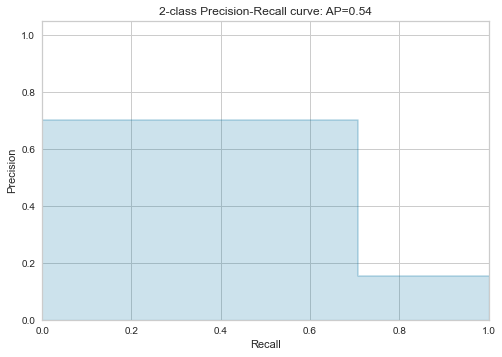

roc auc score: 0.8265734265734267



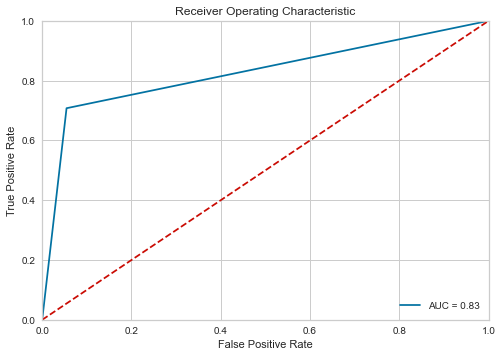

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       715
           1       0.70      0.71      0.70       130

    accuracy                           0.91       845
   macro avg       0.82      0.83      0.83       845
weighted avg       0.91      0.91      0.91       845


Confusion Matrix: 
 [[676  39]
 [ 38  92]]

End of validation Result



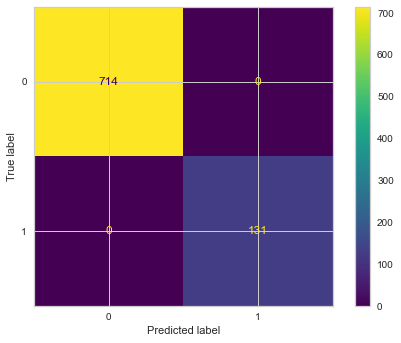

In [102]:
import xgboost as xgb

clf_xgb=xgb.XGBClassifier(random_state=1, learning_rate=0.01)
clf_xgb.fit(X_train_sm, y_train_sm)

clf_score(clf_xgb, X_train_sm, y_train_sm, train=False)

### AdaBoost

Validation Result:

accuracy score: 0.8533



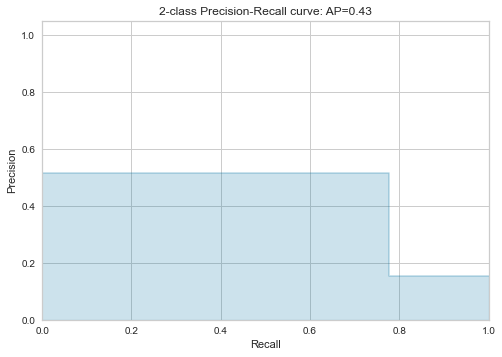

roc auc score: 0.822027972027972



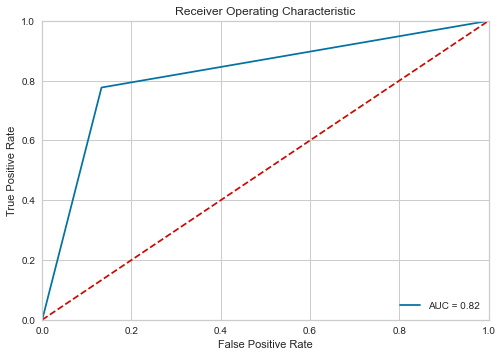

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       715
           1       0.52      0.78      0.62       130

    accuracy                           0.85       845
   macro avg       0.74      0.82      0.76       845
weighted avg       0.89      0.85      0.86       845


Confusion Matrix: 
 [[620  95]
 [ 29 101]]

End of validation Result



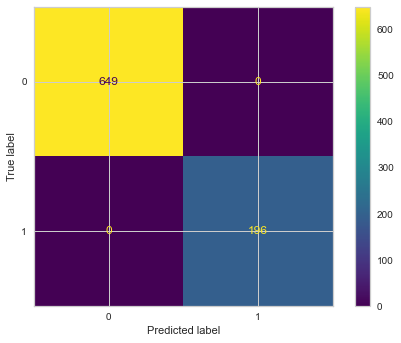

In [80]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada_boost = AdaBoostClassifier(n_estimators=40, random_state=42)
clf_ada_boost.fit(X_train_ros, y_train_ros)

clf_score(clf_ada_boost, X_train_ros, y_train_ros,  train=False)

### CatBoost

In [95]:
#!pip install catboost

from catboost import CatBoostClassifier, Pool

clf_cat_boost = CatBoostClassifier(iterations=2,
                                   depth=2,
                                   learning_rate=1,
                                   loss_function='Logloss',
                                   verbose=True)
# train the model
clf_cat_boost.fit(X_train_ros, y_train_ros)

# make the prediction using the resulting model
preds_class = clf_cat_boost.predict(X_val)
preds_proba = clf_cat_boost.predict_proba(X_val)
print("class = ", preds_class)
print("proba = ", preds_proba)

clf_score(clf_cat_boost, X_train_ros, y_train_ros,  train=False)

AttributeError: module 'pandas' has no attribute 'SparseDtype'

### AutoKeras

In [82]:
! pip install autokeras==1.0.0b0

     |████████████████████████████████| 45 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 1.8 MB/s eta 0:00:011


  Created wheel for autokeras: filename=autokeras-1.0.0b0-py3-none-any.whl size=48700 sha256=6a1ca96c2bcd7adcc2bc520a86170be26c9a76cb2c01cdf32321e9a18d841f71
  Stored in directory: /Users/sohailbuttmac2018/Library/Caches/pip/wheels/0d/4e/98/8861de5bb5ac55c47c452a7dcea777ebd7b06bd8237fcdcb3d
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-py3-none-any.whl size=78936 sha256=763336fa37f94b16e434fb639e36749846776c98e452de6c5dc4e7bbb3894f6a
  Stored in directory: /Users/sohailbuttmac2018/Library/Caches/pip/wheels/53/3d/c3/160c686bd74a18989843fcd015e8f6954ca8d834fd2ef4658a
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15354 sha256=6a094a4fe2706b3a8d5d2bf9da88b80c6cb7bdf429728e3157458a71ef0a029e
  Stored in directory: /Users/sohailbuttmac2018/Library/Caches/pip/wheels/08/8f/5f/253d0105a55bd84ee61ef0d37dbf70421e61e0cd70cef7c5e1
Successfully built autokeras keras-tuner terminaltables


In [83]:
import autokeras as ak

# It tries 10 different models.
clf_auto_keras = ak.StructuredDataClassifier(max_trials=10)
# Feed the structured data classifier with training data.
clf_auto_keras.fit(X_train_ros, y_train_ros)
# Predict with the best model.
#predicted_y = clf_auto_keras.predict(X_val)
# Evaluate the best model with testing data.
#print(clf_auto_keras.evaluate(X_val, y_val))


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
structured_data...|lightgbm          |?                 
light_gbm_1/lig...|5                 |?                 
light_gbm_1/lig...|0.6               |?                 
light_gbm_1/lig...|10                |?                 
light_gbm_1/lig...|0.105             |?                 
light_gbm_1/lig...|50                |?                 
optimizer         |adam              |?                 

Epoch 1/1000


AttributeError: in user code:

    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:758 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:387 update_state
        self.build(y_pred, y_true)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:317 build
        self._metrics = nest.map_structure_up_to(y_pred, self._get_metric_objects,
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/nest.py:1159 map_structure_up_to
        return map_structure_with_tuple_paths_up_to(
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/nest.py:1257 map_structure_with_tuple_paths_up_to
        results = [
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/nest.py:1258 <listcomp>
        func(*args, **kwargs) for args in zip(flat_path_gen, *flat_value_gen)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/nest.py:1161 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:418 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:418 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:439 _get_metric_object
        y_t_rank = len(y_t.shape.as_list())

    AttributeError: 'tuple' object has no attribute 'shape'


Try different classifiers

DecisionTreeClassifier
Validation Result:

accuracy score: 0.9574



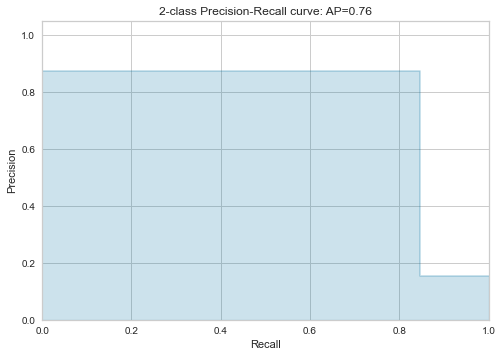

roc auc score: 0.9118881118881119



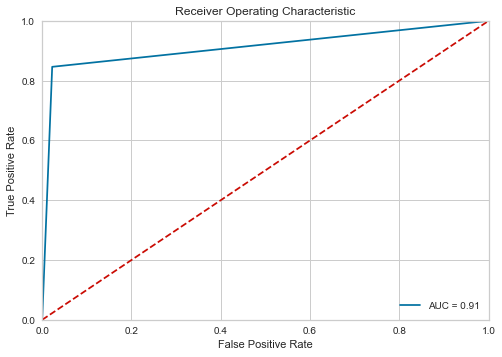

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       715
           1       0.87      0.85      0.86       130

    accuracy                           0.96       845
   macro avg       0.92      0.91      0.92       845
weighted avg       0.96      0.96      0.96       845


Confusion Matrix: 
 [[699  16]
 [ 20 110]]

End of validation Result

GaussianNB            
Validation Result:

accuracy score: 0.5728



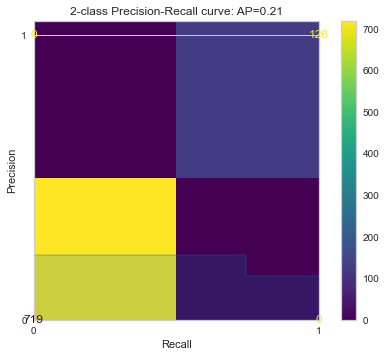

roc auc score: 0.6437062937062937



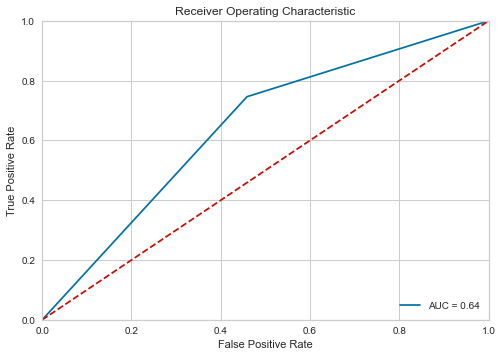

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.54      0.68       715
           1       0.23      0.75      0.35       130

    accuracy                           0.57       845
   macro avg       0.57      0.64      0.52       845
weighted avg       0.81      0.57      0.63       845


Confusion Matrix: 
 [[387 328]
 [ 33  97]]

End of validation Result

SVC                   
Validation Result:

accuracy score: 0.9101



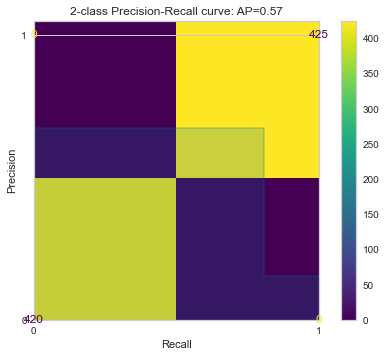

roc auc score: 0.868181818181818



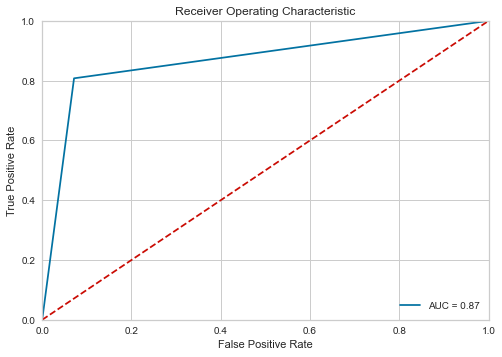

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       715
           1       0.67      0.81      0.73       130

    accuracy                           0.91       845
   macro avg       0.82      0.87      0.84       845
weighted avg       0.92      0.91      0.91       845


Confusion Matrix: 
 [[664  51]
 [ 25 105]]

End of validation Result

KNeighborsClassifier  
Validation Result:

accuracy score: 0.8663



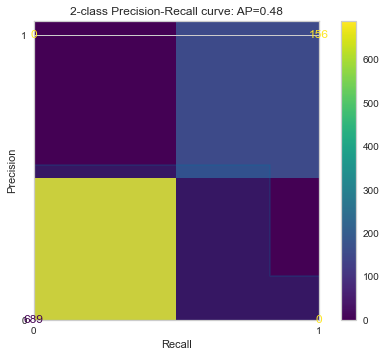

roc auc score: 0.8517482517482519



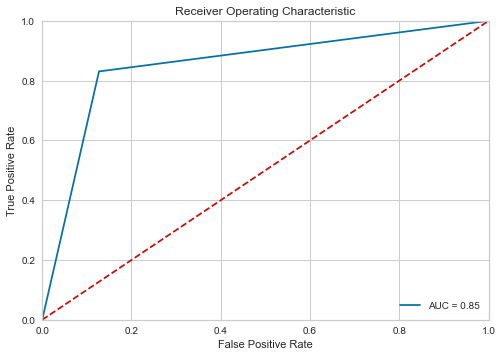

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       715
           1       0.54      0.83      0.66       130

    accuracy                           0.87       845
   macro avg       0.75      0.85      0.79       845
weighted avg       0.90      0.87      0.88       845


Confusion Matrix: 
 [[624  91]
 [ 22 108]]

End of validation Result



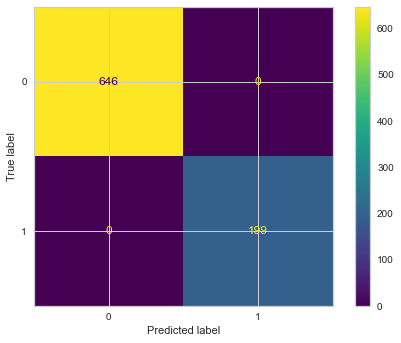

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

for model in [
    DecisionTreeClassifier,
    GaussianNB,
    SVC,
    KNeighborsClassifier,
]:
    clf = model()
    clf.fit(X_train_ros, y_train_ros)
    print(f"{model.__name__:22}")
    clf_score(clf, X_train_ros, y_train_ros train=False)

# 4 - MODEL SELECTION AND TUNING

### Compare Accuracy of Models

Dummy Classifier: 0.490651 (0.009076)
Logistic Regression: 0.815991 (0.016311)
Random Forest Classifier: 0.991431 (0.002000)
KNeighborsClassifier: 0.901217 (0.011593)
[20:06:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the o

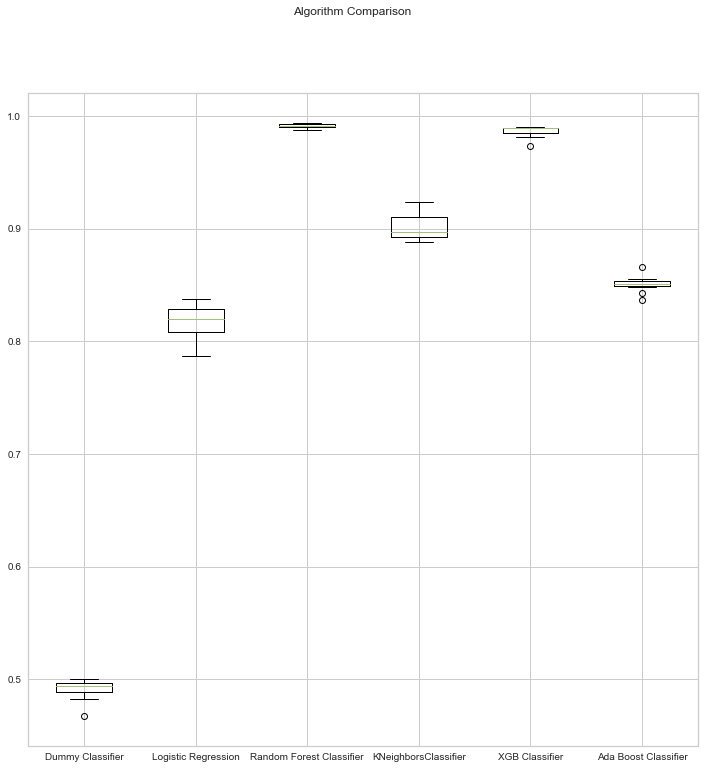

In [287]:
# train the model
# prepare models
models = []
models.append(('Dummy Classifier', DummyClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('XGB Classifier', xgb.XGBClassifier()))
models.append(('Ada Boost Classifier', AdaBoostClassifier()))
#models.append(('Cat Boost Classifier', clf_cat_boost.fit()))
#models.append(('Keras Classifier', clf_auto_keras.fit()))
#models.append(('Keras Classifier', clf_auto_keras.fit()))
#models.append(('Multiple Classifiers', clf.fit()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_ros, y_train_ros, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize = [12,12])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Percision Score of Models

Dummy Classifier: 0.242286 (0.242384)
Logistic Regression: 0.816390 (0.023262)
Random Forest Classifier: 0.983718 (0.006211)
KNeighborsClassifier: 0.850018 (0.019059)
[20:07:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:23] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the o

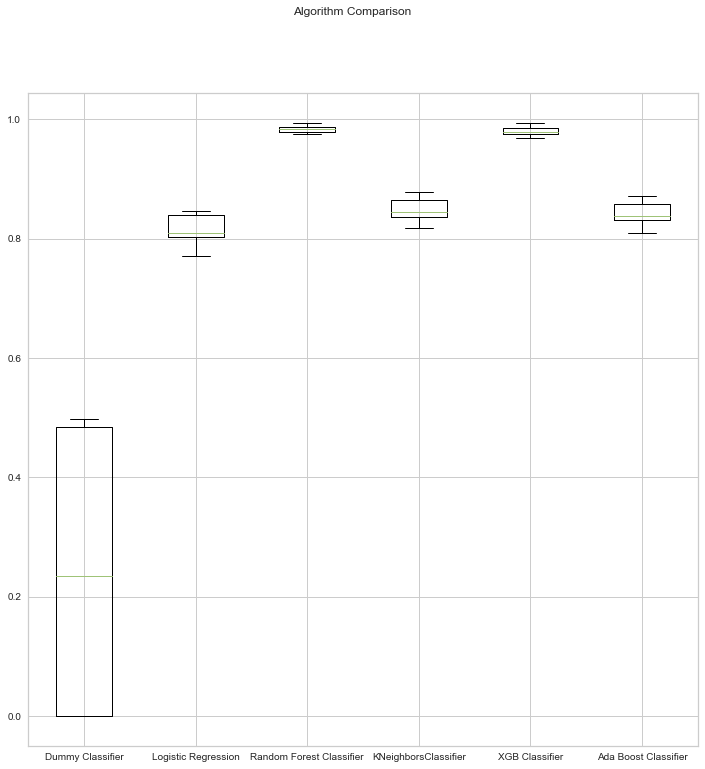

In [288]:
# train the model
# prepare models
models = []
models.append(('Dummy Classifier', DummyClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('XGB Classifier', xgb.XGBClassifier()))
models.append(('Ada Boost Classifier', AdaBoostClassifier()))
#models.append(('Cat Boost Classifier', clf_cat_boost.fit()))
#models.append(('Keras Classifier', clf_auto_keras.fit()))
#models.append(('Keras Classifier', clf_auto_keras.fit()))
#models.append(('Multiple Classifiers', clf.fit()))

# evaluate each model in turn
results = []
names = []
scoring = 'precision'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_ros, y_train_ros, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize = [12,12])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Recall Score of Models

Dummy Classifier: 0.700000 (0.458258)
Logistic Regression: 0.823346 (0.025069)
Random Forest Classifier: 0.997560 (0.003302)
KNeighborsClassifier: 0.976367 (0.012180)
[20:07:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the o

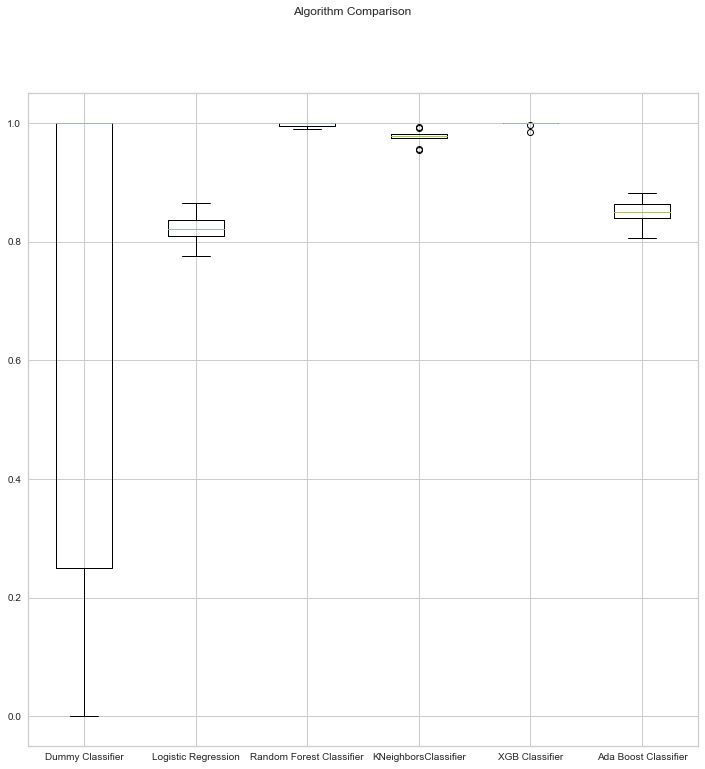

In [289]:
# train the model
# prepare models
models = []
models.append(('Dummy Classifier', DummyClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('XGB Classifier', xgb.XGBClassifier()))
models.append(('Ada Boost Classifier', AdaBoostClassifier()))
#models.append(('Cat Boost Classifier', clf_cat_boost.fit()))
#models.append(('Keras Classifier', clf_auto_keras.fit()))
#models.append(('Keras Classifier', clf_auto_keras.fit()))
#models.append(('Multiple Classifiers', clf.fit()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_ros, y_train_ros, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize = [12,12])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## F1 Score of Models

Dummy Classifier: 0.391851 (0.320023)
Logistic Regression: 0.818188 (0.017005)
Random Forest Classifier: 0.993208 (0.003342)
KNeighborsClassifier: 0.910640 (0.010145)
[20:08:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the o

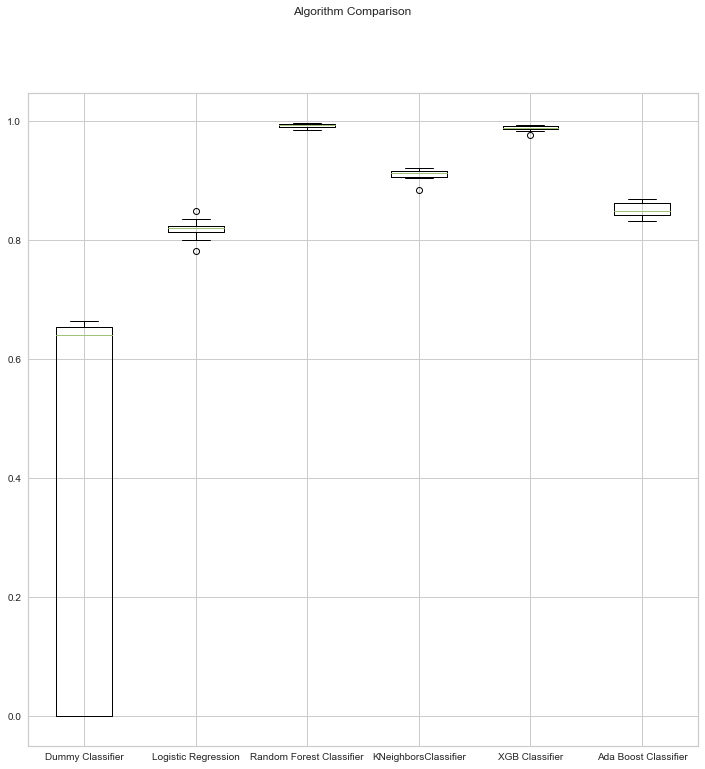

In [290]:
# train the model
# prepare models
models = []
models.append(('Dummy Classifier', DummyClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('XGB Classifier', xgb.XGBClassifier()))
models.append(('Ada Boost Classifier', AdaBoostClassifier()))
#models.append(('Cat Boost Classifier', clf_cat_boost.fit()))
#models.append(('Keras Classifier', clf_auto_keras.fit()))
#models.append(('Keras Classifier', clf_auto_keras.fit()))
#models.append(('Multiple Classifiers', clf.fit()))

# evaluate each model in turn
results = []
names = []
scoring = 'f1'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_ros, y_train_ros, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize = [12,12])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [291]:
#model_comparison = {'Model':['Logistic Regression','Random Forest','KNN','XGBoost','AdaBoost','CatBoost'],
                 #'Accuracy': [accuracy_score(y_test, clf_log_reg.predict(X_val)),
#                             accuracy_score(y_test, clf_rf.predict(X_val)),
 #                            accuracy_score(y_test, clf_knn.predict(X_val)),
  #                           accuracy_score(y_test, clf_xgb.predict(X_val)),
   #                          accuracy_score(y_test, clf_ada_boost.predict(X_val)),
    #                         accuracy_score(y_test, clf_cat_boost.predict(X_val))],}
                 #'AUC-ROC': [lasso_r2,ridge_r2,mars_r2,tree_r2,knn_r2,rf_r2,gbt_r2,ann_r2]}


#mse_comparison = pd.DataFrame(mse_comparison)
#mse_comparison

#plt.figure(figsize=(15,8))
#sns.barplot(x="Model", y="Score", data=mse_comparison, palette='Purples')

In [292]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

clf_log_reg_model = LogisticRegression(C=0.0001, random_state=42, max_iter=1000)
clf_rf_model = RandomForestClassifier(n_estimators=40, random_state=42)
clf_knn_model=KNeighborsClassifier(n_neighbors=4)
clf_xgb_model=xgb.XGBClassifier(random_state=1, learning_rate=0.01)
clf_ada_boost_model = AdaBoostClassifier(n_estimators=40, random_state=42)
#clf_cat_boost_model = CatBoostClassifier(iterations=2,
                                   #depth=2,
                                   #learning_rate=1,
                                   #loss_function='Logloss',
                                   #verbose=True)
#clf_auto_keras_model = ak.StructuredDataClassifier(max_trials=10)
#for model in [
#    DecisionTreeClassifier,
#    GaussianNB,
#    SVC,
#    KNeighborsClassifier,
#]:
#    clf = model()

In [293]:
def models_evaluation(X_train_ros, y_train_ros, folds):
    # Perform cross-validation to each machine learning classifier
    clf_log_reg = cross_validate(clf_log_reg_model, X_train_ros, y_train_ros, cv=folds, scoring=scoring)
    clf_rf = cross_validate(clf_rf_model, X_train_ros, y_train_ros, cv=folds, scoring=scoring)
    clf_knn = cross_validate(clf_knn_model, X_train_ros, y_train_ros, cv=folds, scoring=scoring)
    clf_xgb = cross_validate(clf_xgb_model, X_train_ros, y_train_ros, cv=folds, scoring=scoring)
    clf_ada_boost = cross_validate(clf_ada_boost_model, X_train_ros, y_train_ros, cv=folds, scoring=scoring)
#    clf_cat_boost = cross_validate(clf_cat_boost_model, X_train_ros, y_train_ros, cv=folds, scoring=scoring)
#    clf_auto_keras = cross_validate(clf_auto_keras_model, X_train_ros, y_train_ros, cv=folds, scoring=scoring)
#    clf_model = cross_validate(clf, X_train_ros, y_train_ros, cv=folds, scoring=scoring)


    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[clf_log_reg['test_accuracy'].mean(),
                                                               clf_log_reg['test_precision'].mean(),
                                                               clf_log_reg['test_recall'].mean(),
                                                               clf_log_reg['test_f1_score'].mean()],
                                       
                                      'Random Forest Classifier':[clf_rf['test_accuracy'].mean(),
                                                                   clf_rf['test_precision'].mean(),
                                                                   clf_rf['test_recall'].mean(),
                                                                   clf_rf['test_f1_score'].mean()],
                                       
                                      'K Neighbors Classifier':[clf_knn['test_accuracy'].mean(),
                                                       clf_knn['test_precision'].mean(),
                                                       clf_knn['test_recall'].mean(),
                                                       clf_knn['test_f1_score'].mean()],
                                       
                                      'XGB Classifier':[clf_xgb['test_accuracy'].mean(),
                                                       clf_xgb['test_precision'].mean(),
                                                       clf_xgb['test_recall'].mean(),
                                                       clf_xgb['test_f1_score'].mean()],
                                       
                                      'Ada Boost Classifier':[clf_ada_boost['test_accuracy'].mean(),
                                                              clf_ada_boost['test_precision'].mean(),
                                                              clf_ada_boost['test_recall'].mean(),
                                                              clf_ada_boost['test_f1_score'].mean()]},
                                       
                                       #'Cat Boost Classifier':[clf_cat_boost['test_accuracy'].mean(),
                                        #                      clf_cat_boost['test_precision'].mean(),
                                         #                     clf_cat_boost['test_recall'].mean(),
                                          #                    clf_cat_boost['test_f1_score'].mean()]},
                                       
                                           #'Keras Classifier':[clf_auto_keras['test_accuracy'].mean(),
                                        #                      clf_auto_keras['test_precision'].mean(),
                                         #                     clf_auto_keras['test_recall'].mean(),
                                          #                    clf_auto_keras['test_f1_score'].mean()]},
                                      
                                         #'Multiple Classifiers':[clf_model['test_accuracy'].mean(),
                                        #                      clf_model['test_precision'].mean(),
                                         #                     clf_model['test_recall'].mean(),
                                          #                    clf_model['test_f1_score'].mean()]},
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
        # Return models performance metrics scores data frame
    return(models_scores_table)

In [294]:
# Run models_evaluation function
models_evaluation(X_train_ros, y_train_ros, 4)

[20:08:25] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:08:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

,Logistic Regression,Random Forest Classifier,K Neighbors Classifier,XGB Classifier,Ada Boost Classifier,Best Score
Accuracy,0.766439,0.986444,0.920225,0.894047,0.841540,Random Forest Classifier
Precision,0.754781,0.974218,0.887017,0.893558,0.838273,Random Forest Classifier
Recall,0.789337,0.999377,0.963231,0.894669,0.846368,Random Forest Classifier
F1 Score,0.771586,0.986625,0.923533,0.894105,0.842282,Random Forest Classifier


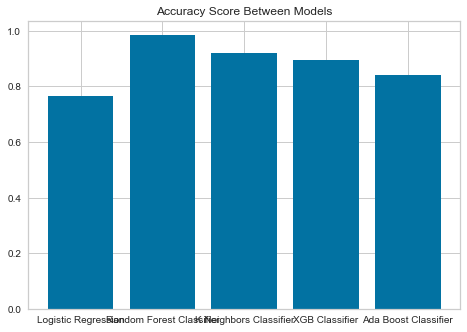

In [295]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
methods = ['Logistic Regression','Random Forest Classifier','K Neighbors Classifier','XGB Classifier','Ada Boost Classifier']
scores = [0.766439, 0.986444, 0.920225, 0.894047,0.841540]
ax.bar(methods,scores)
ax.set_title('Accuracy Score Between Models')
plt.show()

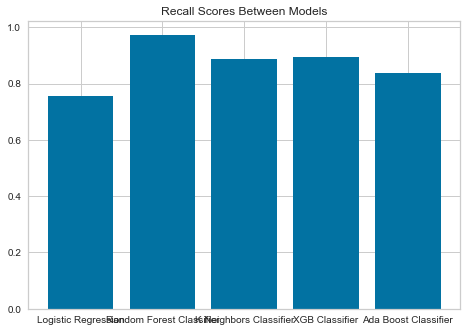

In [296]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
methods = ['Logistic Regression','Random Forest Classifier','K Neighbors Classifier','XGB Classifier','Ada Boost Classifier']
scores = [0.754781, 0.974218, 0.887017, 0.893558,0.838273]
ax.bar(methods,scores)
ax.set_title('Recall Scores Between Models')
plt.show()

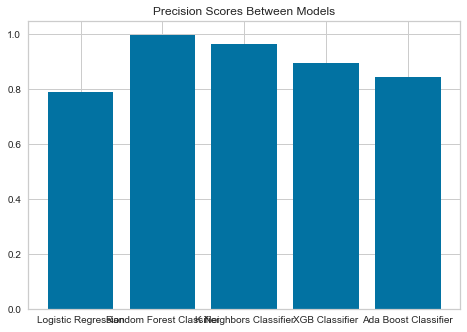

In [297]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
methods = ['Logistic Regression','Random Forest Classifier','K Neighbors Classifier','XGB Classifier','Ada Boost Classifier']
scores = [0.789337,0.999377,0.963231,0.894669,0.846368]
ax.bar(methods,scores)
ax.set_title('Precision Scores Between Models')
plt.show()

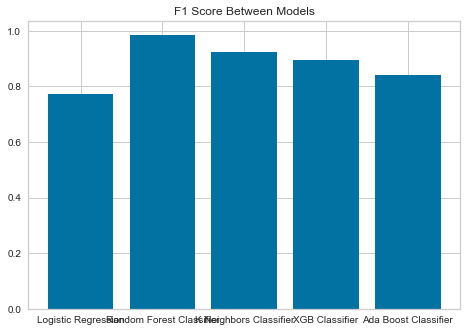

In [298]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
methods = ['Logistic Regression','Random Forest Classifier','K Neighbors Classifier','XGB Classifier','Ada Boost Classifier']
scores = [0.771586,0.986625,0.923533,0.894105,0.842282]
ax.bar(methods,scores)
ax.set_title('F1 Score Between Models')
plt.show()

### Model Selection

The best performing model is...

In [137]:
#accuracy_score(y_test, clf_xgb.predict(X_test))

### Model Tuning

## Grid Search CV

In [299]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param = [{'bootstrap': [True],
 'ccp_alpha': [0.0],
 'class_weight': ['balanced', 'balanced_subsample'],
 'criterion': ['gini','entropy'],
 'max_depth': [None],
 'max_features': ['auto'],
 'max_leaf_nodes': [None],
 'max_samples': [None],
 'min_impurity_decrease': [0.0],
 'min_impurity_split': [None],
 'min_samples_leaf': [1],
 'min_samples_split': [2,3,4],
 'min_weight_fraction_leaf': [0.0],
 'n_estimators': [20,40,60,100],
 'n_jobs': [None],
 'oob_score': [False,bool],
 'random_state': [42],
 'verbose': [0],
 'warm_start': [False]}]

rnd_search = GridSearchCV(RandomForestClassifier(), param, cv=9)
rnd_search.fit(X_train_ros, y_train_ros)
print(rnd_search.best_params_)
print(rnd_search.best_score_)


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
0.9918973978870027


## Randomized Search CV

In [300]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
param = [{'bootstrap': [True],
 'ccp_alpha': [0.0],
 'class_weight': ['balanced', 'balanced_subsample'],
 'criterion': ['gini','entropy'],
 'max_depth': [None],
 'max_features': ['auto'],
 'max_leaf_nodes': [None],
 'max_samples': [None],
 'min_impurity_decrease': [0.0],
 'min_impurity_split': [None],
 'min_samples_leaf': [1],
 'min_samples_split': [2,5],
 'min_weight_fraction_leaf': [0.0],
 'n_estimators': [20,100],
 'n_jobs': [None],
 'oob_score': [False,bool],
 'random_state': [42],
 'verbose': [0],
 'warm_start': [False]}]
rnd_search = RandomizedSearchCV(RandomForestClassifier(), param, 
n_iter =10, cv=9)
rnd_search.fit(X_train_ros, y_train_ros)
print(rnd_search.best_params_)
print(rnd_search.best_score_)

{'warm_start': False, 'verbose': 0, 'random_state': 42, 'oob_score': False, 'n_jobs': None, 'n_estimators': 100, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_split': None, 'min_impurity_decrease': 0.0, 'max_samples': None, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced', 'ccp_alpha': 0.0, 'bootstrap': True}
0.9911186541002562


### Feature Importance

In [ ]:
#train_names = train.drop(columns=['Churn'])
#feat_importances = pd.Series(clf_rf.feature_importances_, index=train_names.columns)
#feat_importances.plot(kind='barh', color='b', align='center', figsize=(20,10))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier('warm_start': False, 'verbose': 0, 'random_state': 42, 'oob_score': <class 'bool'>, 'n_jobs': None, 'n_estimators': 100, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_impurity_split': None, 'min_impurity_decrease': 0.0, 'max_samples': None, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'ccp_alpha': 0.0, 'bootstrap': True)
clf_rf.fit(X_train_ros, y_train_ros)


In [ ]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Test Model on Test Set

**Build a Pipeline for Processing and Prediction**

In [ ]:
num_attribs = test[['Tenure', 'WarehouseToHome', 'HourSpendOnApp','NumberOfDeviceRegistered', 'SatisfactionScore', 
                   'NumberOfAddress','OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount','DaySinceLastOrder', 
                    'CashbackAmount']]
cat_attribs = test[['PreferredLoginDevice','CityTier', 'PreferredPaymentMode','Gender', 'PreferedOrderCat','MaritalStatus',
                    'Complain']]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
    ])
test_num_tr = num_pipeline.fit_transform(num_attribs)

from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(sparse=False), cat_attribs),
    ])
test_prepared = full_pipeline.fit_transform(test)


In [ ]:
test